#### imports

In [74]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

#### find out how many qubits are needed

In [75]:
# Ask for range (0 - x).
max_num = int(input('Choose x for a max range of  (0 - x)'))

# Find out how many qubits are needed based on range.
qubit_vals = [1]

while sum(qubit_vals) < max_num:
    qubit_vals.append(qubit_vals[-1] * 2)

if sum(qubit_vals) > max_num:
    qubit_vals.pop()

n_qubits = len(qubit_vals)

#### create quantum circuit

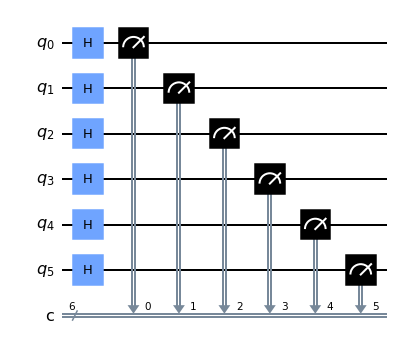

In [76]:
qc = QuantumCircuit(n_qubits, n_qubits)

for i in range(n_qubits):
    qc.h(i)

qc.measure(range(n_qubits), range(n_qubits))

qobj = assemble(qc)

qc.draw(output='mpl')

#### run on simulator

In [77]:
simulator = Aer.get_backend('qasm_simulator')

result = execute(qc, simulator, shots=1, memory=True).result()
state = result.get_memory(qc)[0]

print('statevector ->', state)

statevector -> 111011


#### show number produced.

In [78]:
state_reversed = state[::-1]
num = 0

for i_1, i_2 in zip(state_reversed, qubit_vals):
    if int(i_1) == 1:
        num += i_2

print(num)

59
